# Aggregate BigWig

Playing with merging bigwigs.

In [1]:
import os
import sys
from pathlib import Path
from multiprocessing import Pool
from functools import partial
from collections import namedtuple

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd
from scipy.stats import mode

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pyBigWig

# Project level imports
from ncbi_remap.notebook import Nb
from ncbi_remap.plotting import make_figs
from ncbi_remap.bigWigMerge import parse_bigWig, parse_chromSizes, create_entry_mean

In [2]:
# Setup notebook
nbconfig = Nb.setup_notebook()

Please check output/fbgn2chrom.tsv. If it does not exist, run bin/fbgn2chrom.py
last updated: 2018-10-15 
Git hash: 3765152b3743475ea4bc39fbc7a920c25ee83adc


In [3]:
# Connect to data store
store = pd.HDFStore('../output/sra.h5', mode='r')

In [4]:
srxs = np.loadtxt('../output/uber-stranded-wf/uber_srxs.txt', dtype=str)

In [5]:
fnames = [f'../output/aln-wf/samples/{srx}/{srx}.flybase.first.bw' for srx in srxs[:20]]

In [6]:
chromSizes = parse_chromSizes('../output/dmel_r6-11.flybase.chromsizes')

In [7]:
Args = namedtuple('Args', ['input', 'nthreads'])
args = Args(fnames, 8)

In [8]:
chrom = 'X'
start = 0
end = 23_542_271 

In [9]:
bob = create_entry_mean(args, chrom, start, end)

In [10]:
bob.shape

(23542271,)

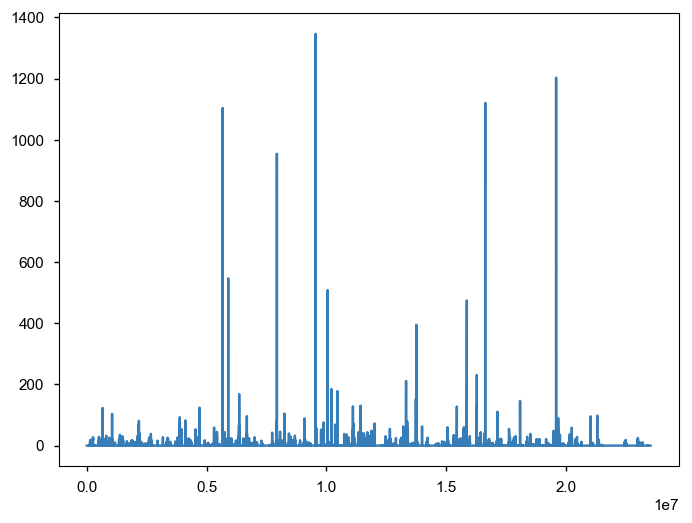

In [22]:
plt.plot(bob)